![](https://i.ytimg.com/vi/v-C2zV6939c/maxresdefault.jpg)

# Let's import required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from scipy.stats import skew
import pylab


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

# We will import the CSV file for analysis now:

In [2]:
data=pd.read_csv("CarPrice.csv")
data

,Unnamed: 0,Brand,Model,Variant,Man_year,Driven_km,Fuel,Num_of_owners,Location,Price
0,0,Hyundai,Grand i10,Asta 1.2 Kappa VTVT [2013-2016],2016,"46,471 Kms",Petrol,First,Mumbai,5.5 Lakh
1,1,Hyundai,Verna,Fluidic 1.6 VTVT SX,2013,"92,173 Kms",Petrol,First,Mumbai,4.25 Lakh
2,2,Jeep,Compass,Sport 2.0 Diesel,2018,"34,335 Kms",Diesel,First,Mumbai,14.05 Lakh
3,3,Maruti Suzuki,Celerio,VXi [2017-2019],2017,"10,000 Kms",Petrol,First,Mumbai,4.25 Lakh
4,4,BMW,X1,sDrive20d M Sport,2019,"49,000 Kms",Diesel,First,Mumbai,35 Lakh
...,...,...,...,...,...,...,...,...,...,...
4805,635,Hyundai,i20 Active,1.2 S,2016,"79,000 Kms",Petrol,First,Kalyan,5.65 Lakh
4806,636,Mahindra,XUV500,W8,2012,"78,000 Kms",Diesel,Second,Kalyan,5.25 Lakh
4807,637,Maruti Suzuki,Baleno,Zeta 1.2,2016,"40,000 Kms",Petrol,First,Kalyan,5.95 Lakh
4808,638,Maruti Suzuki,Celerio,ZXi AMT [2017-2019],2018,"30,000 Kms",Petrol,First,Kalyan,4.95 Lakh


![](https://group.mercedes-benz.com/bilder/karriere/ueber-uns/artificial-intelligence/use-cases/predictive-pricing-w614xh345-cutout.jpg)

In [3]:
data.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Variant', 'Man_year', 'Driven_km',
       'Fuel', 'Num_of_owners', 'Location', 'Price'],
      dtype='object')

Above is the list of all columns.

In [4]:
data.shape

(4810, 10)

Dataset has 4810 rows and 10 columns.

In [5]:
data.dtypes

Unnamed: 0        int64
Brand            object
Model            object
Variant          object
Man_year         object
Driven_km        object
Fuel             object
Num_of_owners    object
Location         object
Price            object
dtype: object

We can see both type of columns numerical and object type.

In [6]:
#pd.set_option('display.max_rows',None)
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,4810.0,NaN,NaN,NaN,719.205405,517.820003,0.0,300.0,601.0,1080.0,2002.0
Brand,4810,34,-,2657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,4810,202,-,2657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Variant,4810,790,-,2657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Man_year,4810,167,-,2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_km,4810,1250,-,2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel,4810,10,-,2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_owners,4810,7,First,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,4810,21,-,2657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4810,712,-,2657,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see - in some variables most frequently value. We will work on it.

We can see count is all same for all variable, let's check for null values now:

In [7]:
data.isnull().sum()

Unnamed: 0       0
Brand            0
Model            0
Variant          0
Man_year         0
Driven_km        0
Fuel             0
Num_of_owners    0
Location         0
Price            0
dtype: int64

<AxesSubplot:>

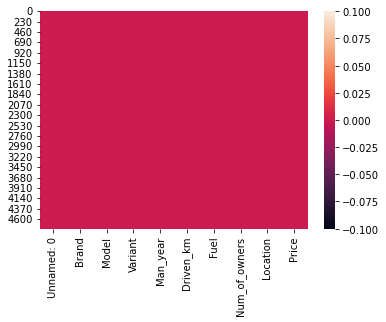

In [8]:
#Let's see it with the help of heatmap:
sns.heatmap(data.isnull())

our dataset does not contains null values.

In [9]:
# dropping 'Unnamed: 0 varible as its not further analysis
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data['Driven_km'] = data['Driven_km'].str.replace('-', 'NA') # replaced - with NA
data['Driven_km'] = data['Driven_km'].str.replace(' Kms', '') # removed kms as column as column name already has km it in

In [11]:
data['Price'] = data['Price'].str.replace('₹', '')#removed ₹ 
data['Price'] = data['Price'].str.replace(',', '')#removed , as well

In [12]:
#dropping all rows where price column does not contain any price
data = data[~data.Price.str.contains("-") == True]

In [13]:
def isfloat(value):
    try:
        float(value)
        return float(value)
    except ValueError:
        return value

In [14]:
data['Price']=data['Price'].apply(isfloat)

In [15]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if x.isdigit():
        x=float(x)
        return float(x)
    if 'Lakh' in x:
        if len(x) > 1:
            return float(x.replace(' Lakh','')) *100000
        return 100000.0
    if 'Crore' in x:
        if len(x) > 1:
            return float(x.replace(' Crore','')) * 10000000
        return 10000000.0

In [16]:
#changing all values of price column in numerical type
data['Price']=data['Price'].apply(value_to_float)

In [17]:
data['Price']

0        550000.0
1        425000.0
2       1405000.0
3        425000.0
4       3500000.0
          ...    
4805     565000.0
4806     525000.0
4807     595000.0
4808     495000.0
4809     455000.0
Name: Price, Length: 2153, dtype: float64

In [18]:
#checking unique values for all object type columns
for i in data.columns:
    if data[i].dtype == 'object':
        print(i, ":", data[i].nunique())

Brand : 33
Model : 201
Variant : 789
Man_year : 134
Driven_km : 982
Fuel : 8
Num_of_owners : 6
Location : 20


we can see manufacturing year has 134

In [19]:
data['Man_year'].value_counts()

2016        178
2017        166
2015        165
2012        148
2014        129
           ... 
Dec 2012      1
Dec 2019      1
Oct 2016      1
Jul 2015      1
Mar 2010      1
Name: Man_year, Length: 134, dtype: int64

some values contains month as well. Let's remove months and only keep year.

In [20]:
data['Man_year'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['Man_year'].value_counts()

2016    285
2017    254
2015    229
2018    207
2012    206
2014    178
2013    174
2011    137
2019    126
2010    115
2020     64
2009     61
2008     39
2021     30
2007     20
2006     11
2004      4
2001      4
2005      4
2002      3
2003      2
Name: Man_year, dtype: int64

In [21]:
#creating cat col list for unique value count till 60 as we will have clear visual for those many values.
cat_col=[]
for i in data:
    if data[i].nunique() <= 70:
        cat_col.append(i)
        
print(cat_col)

['Brand', 'Man_year', 'Fuel', 'Num_of_owners', 'Location']


In [22]:
# let check null values and value counts for all categorical variables
for i in cat_col:
    print(i,"Column value counts:\n", data[i].value_counts(), "\n")

Brand Column value counts:
 Maruti Suzuki       489
Hyundai             387
Honda               190
Mahindra            141
Toyota              135
Mercedes-Benz       121
BMW                 108
Ford                 75
Tata                 74
Volkswagen           72
Audi                 67
Skoda                65
Renault              55
Chevrolet            32
Jaguar               18
MG                   15
Jeep                 14
Fiat                 13
Kia                  11
Datsun               11
Land Rover            9
Mitsubishi            9
Nissan                8
MINI                  8
Porsche               7
Volvo                 5
Bentley               5
Ssangyong             2
Lexus                 2
Aston Martin          2
Premier               1
Isuzu                 1
Mahindra-Renault      1
Name: Brand, dtype: int64 

Man_year Column value counts:
 2016    285
2017    254
2015    229
2018    207
2012    206
2014    178
2013    174
2011    137
2019    126
2010    115
2

Fuel variable has - value in it. And Number of owner has same value with different format. lets make required changes.

In [23]:
data['Fuel'] = data['Fuel'].str.replace('-', 'NA') #replacing - with NA
data['Num_of_owners'] = data['Num_of_owners'].str.replace('-', 'NA') #replacing - with NA
data['Num_of_owners'] = data['Num_of_owners'].str.replace('First','1st') # #replacing First with 1st
data['Num_of_owners'] = data['Num_of_owners'].str.replace('Second','2nd') #replacing Second with 2nd
data['Num_of_owners'] = data['Num_of_owners'].str.replace('Third','3rd') #replacing Third with 3rd
data['Num_of_owners'] = data['Num_of_owners'].str.replace('Fourth', '4th') #replacing Fourth with 4th

Maruti Suzuki       489
Hyundai             387
Honda               190
Mahindra            141
Toyota              135
Mercedes-Benz       121
BMW                 108
Ford                 75
Tata                 74
Volkswagen           72
Audi                 67
Skoda                65
Renault              55
Chevrolet            32
Jaguar               18
MG                   15
Jeep                 14
Fiat                 13
Kia                  11
Datsun               11
Land Rover            9
Mitsubishi            9
Nissan                8
MINI                  8
Porsche               7
Volvo                 5
Bentley               5
Ssangyong             2
Lexus                 2
Aston Martin          2
Premier               1
Isuzu                 1
Mahindra-Renault      1
Name: Brand, dtype: int64


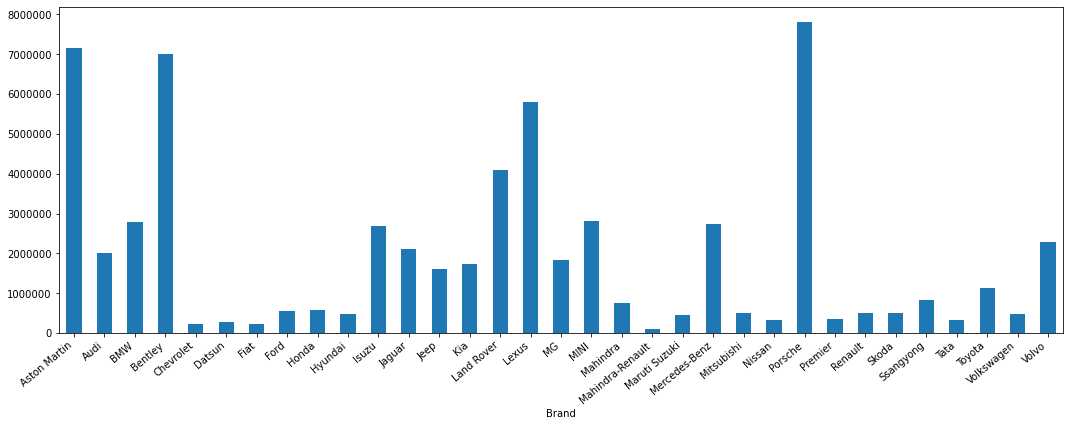

2016    285
2017    254
2015    229
2018    207
2012    206
2014    178
2013    174
2011    137
2019    126
2010    115
2020     64
2009     61
2008     39
2021     30
2007     20
2006     11
2004      4
2001      4
2005      4
2002      3
2003      2
Name: Man_year, dtype: int64


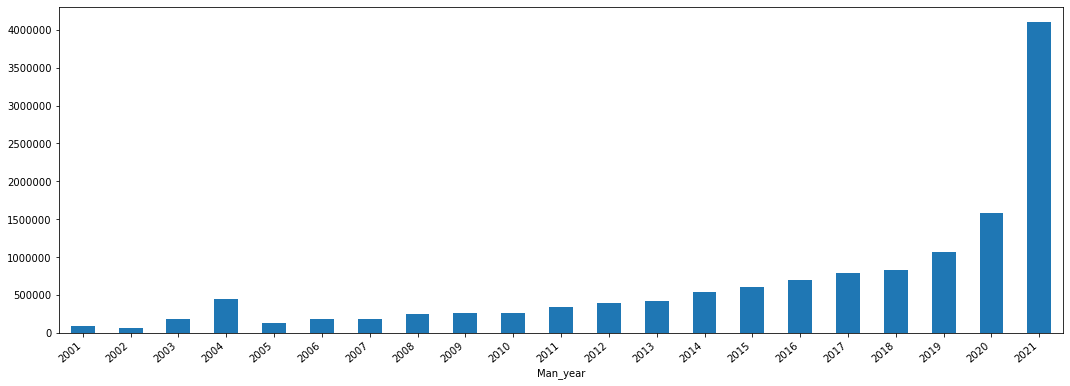

Petrol          1109
Diesel          1014
CNG + Cng         12
CNG                5
Electric           4
Hybrid             3
LPG                3
Petrol + Cng       3
Name: Fuel, dtype: int64


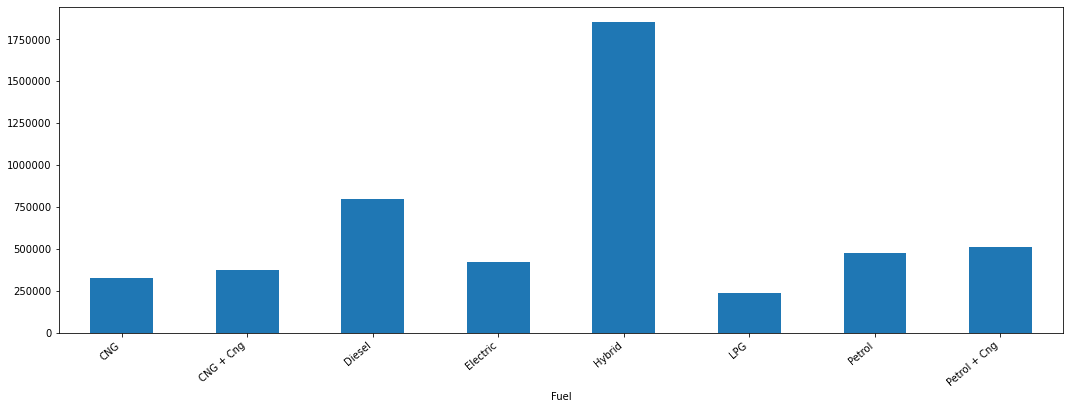

1st                 1546
2nd                  514
3rd                   76
UnRegistered Car      11
4 or More              4
4th                    2
Name: Num_of_owners, dtype: int64


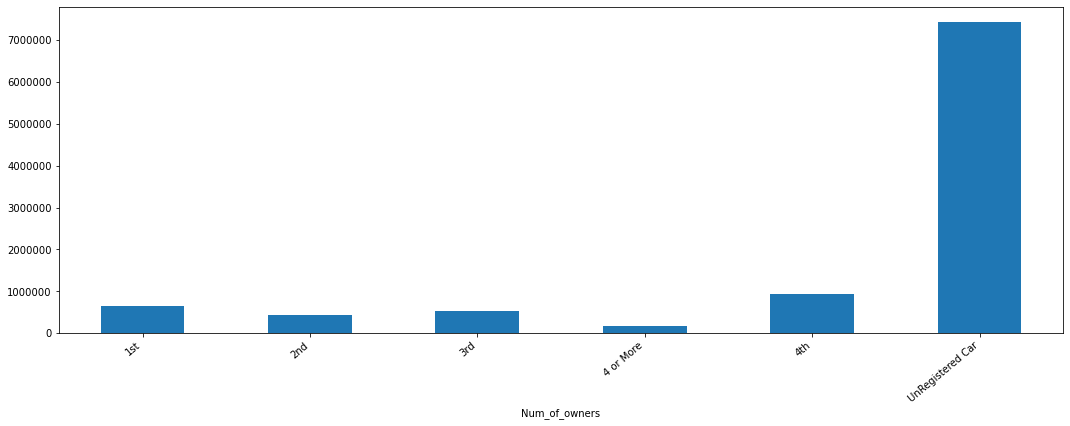

Mumbai         471
Bangalore      398
Indore         270
Bhopal         262
Nagpur         261
Chennai        128
Thane          107
Delhi           57
Kalyan          54
Navi Mumbai     40
Dehradun        37
Kolkata         30
Faridabad       15
Noida            6
Meerut           5
Pune             5
Agra             2
Lucknow          2
Patna            2
Ghaziabad        1
Name: Location, dtype: int64


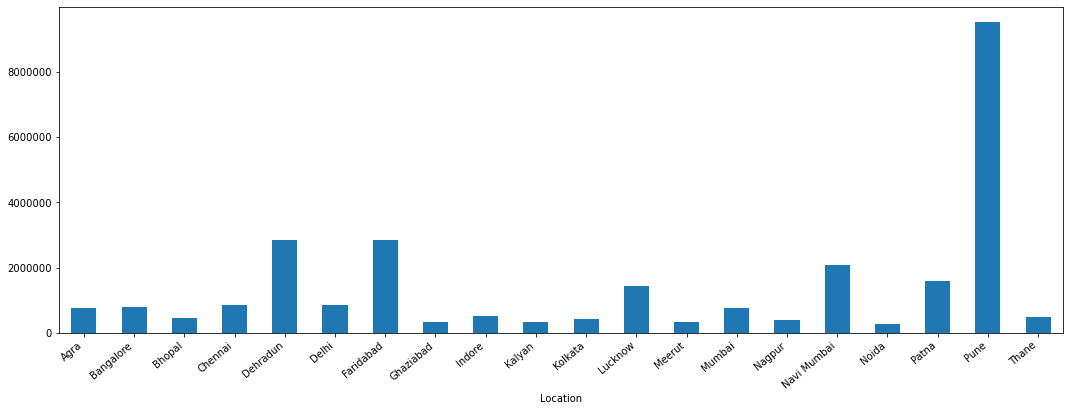

In [24]:
for i in cat_col:
    plt.figure(figsize=(18,6))
    #a=sns.countplot(train[i])
    a=data.groupby(i)['Price'].median().plot.bar()
    print(data[i].value_counts())
    a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
    #a.ticklabel_format(useOffset=False, style='plain')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

In [25]:
#for more than 70 keeping it in one list
dis_col=[]
for i in data:
    if data[i].nunique() > 70:
        dis_col.append(i)
        
print(dis_col)

['Model', 'Variant', 'Driven_km', 'Price']


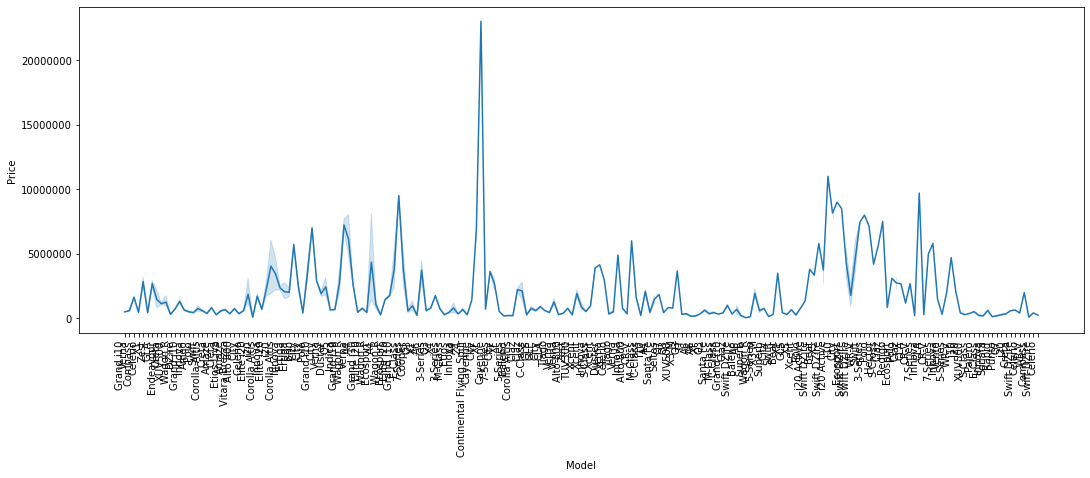

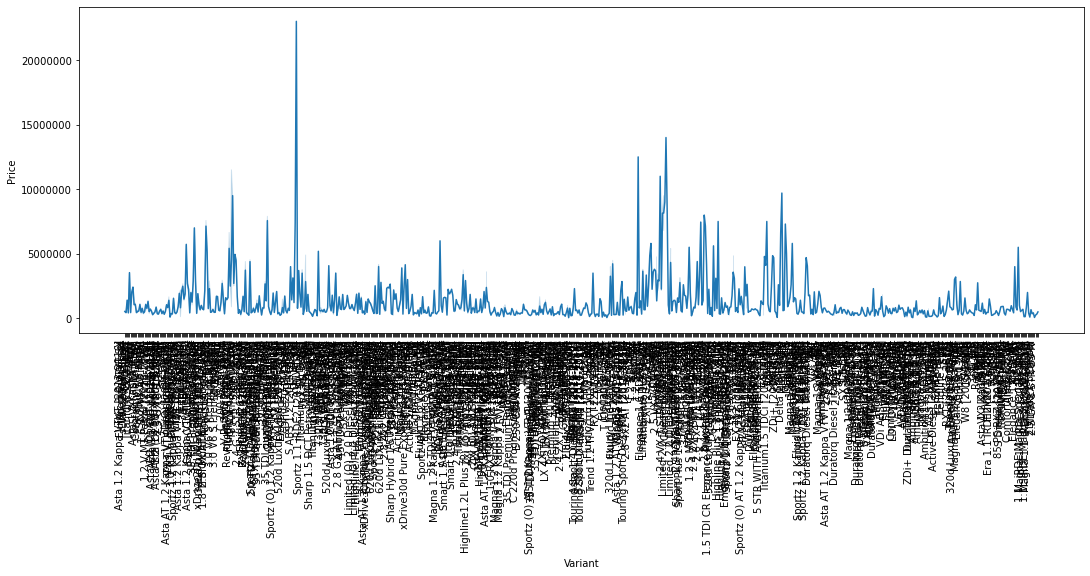

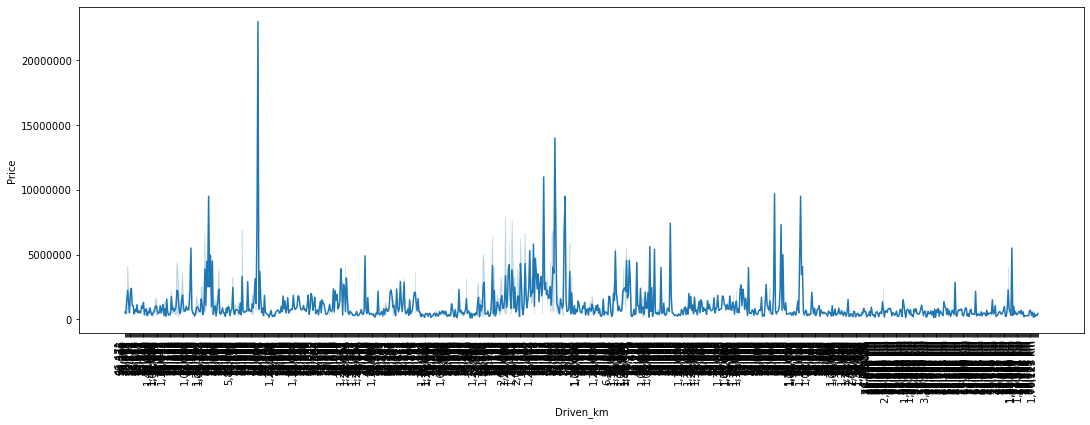

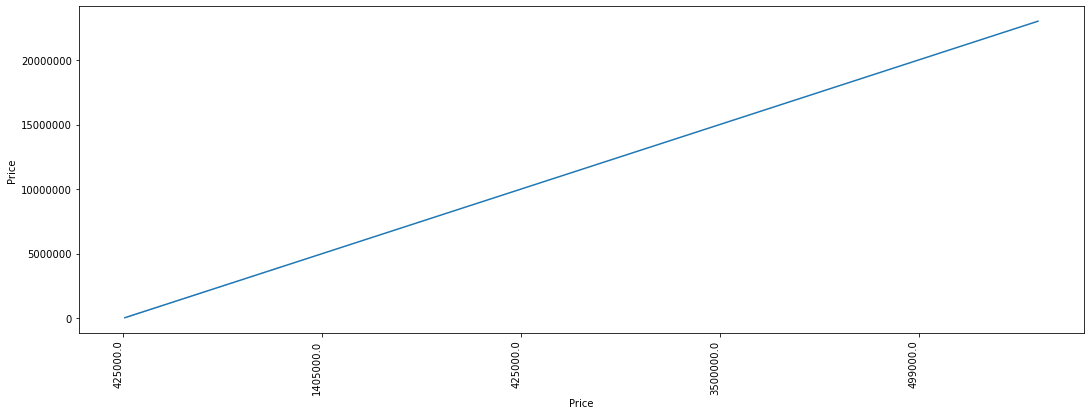

In [26]:
for i in dis_col:
    plt.figure(figsize=(18,6))
    a=sns.lineplot(x=data[i],y=data['Price'],palette='Tableau')
    #a.set_xticklabels(a.get_xticklabels(), rotation=90, ha="right",visible=True)
    a.set_xticklabels(labels=data[i],rotation=90, ha="right")
    #ax.ticklabel_format(useOffset=False, style='plain')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

<Figure size 1296x432 with 0 Axes>

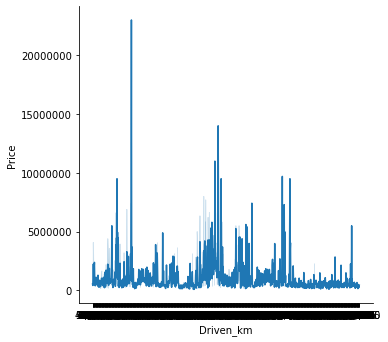

<Figure size 1296x432 with 0 Axes>

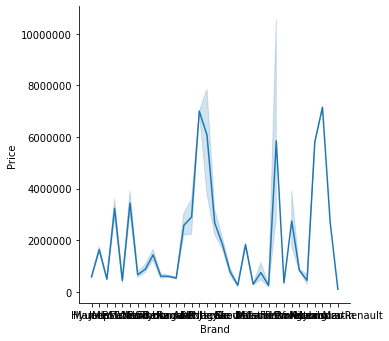

<Figure size 1296x432 with 0 Axes>

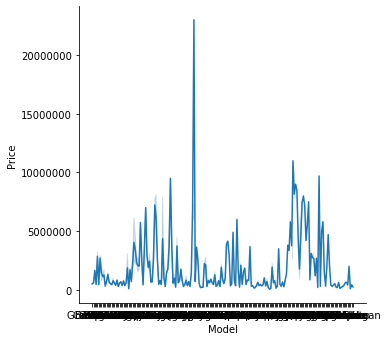

<Figure size 1296x432 with 0 Axes>

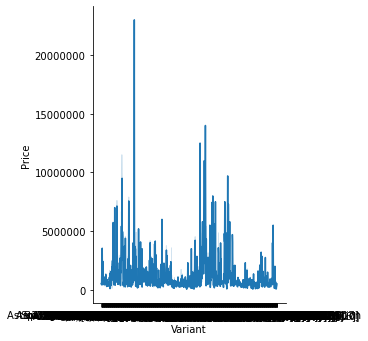

<Figure size 1296x432 with 0 Axes>

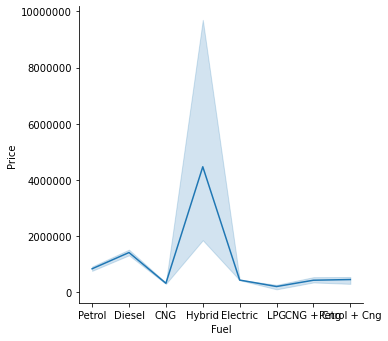

<Figure size 1296x432 with 0 Axes>

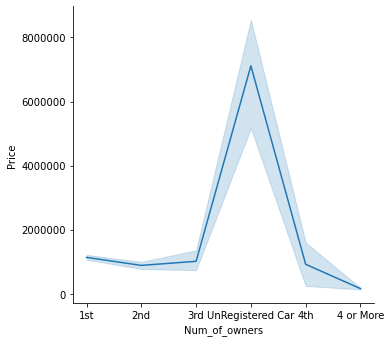

In [27]:
list=['Driven_km','Brand','Model','Variant','Fuel','Num_of_owners']
for i in list:
    plt.figure(figsize=(18,6))
    a=sns.relplot(x=i,y='Price',data=data,kind='line')
    #a.set_xticklabels(labels=data[i],rotation=90, ha="right")
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

# Let's Check the correlation now:

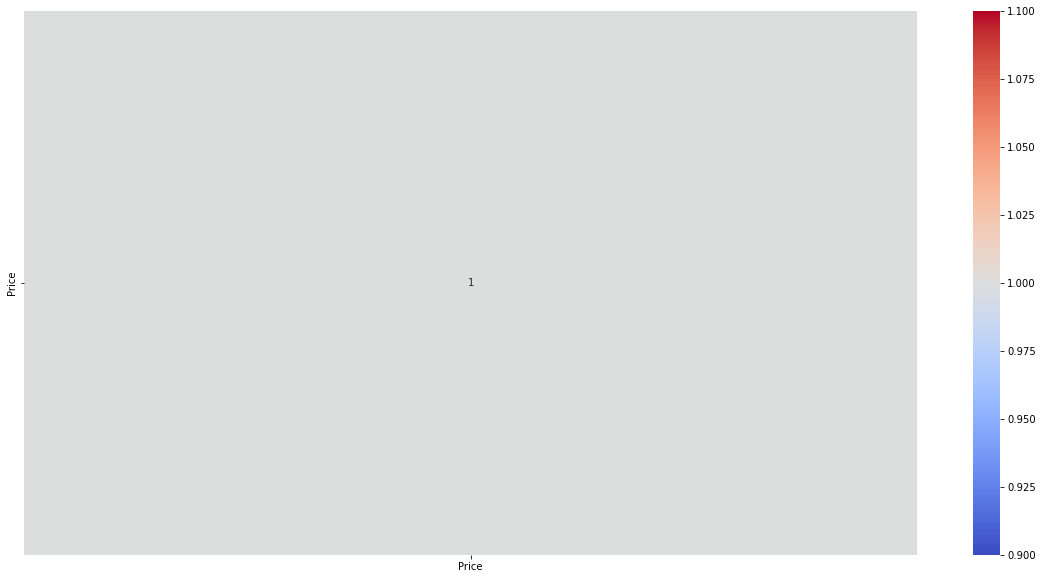

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

Let's change the data type of other object type columns.

In [29]:
data.dtypes

Brand             object
Model             object
Variant           object
Man_year          object
Driven_km         object
Fuel              object
Num_of_owners     object
Location          object
Price            float64
dtype: object

# Encoding:

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=le.fit_transform(data[i].astype(str).values.reshape(-1,1))

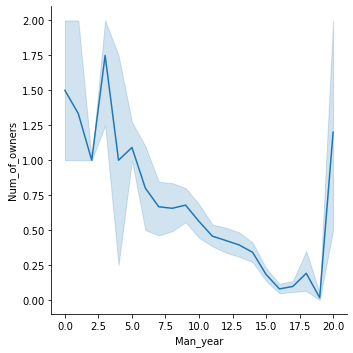

In [31]:
sns.relplot(x='Man_year', y='Num_of_owners',data=data, kind='line')

Num_of_owners.We can see negative relation between Man_year and Num_of_owners.

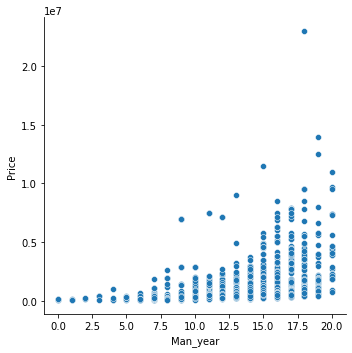

In [32]:
sns.relplot(x='Man_year', y='Price',data=data, kind='scatter')

Num_of_owners.We can see positive relation between Man_year and Price.

<AxesSubplot:>

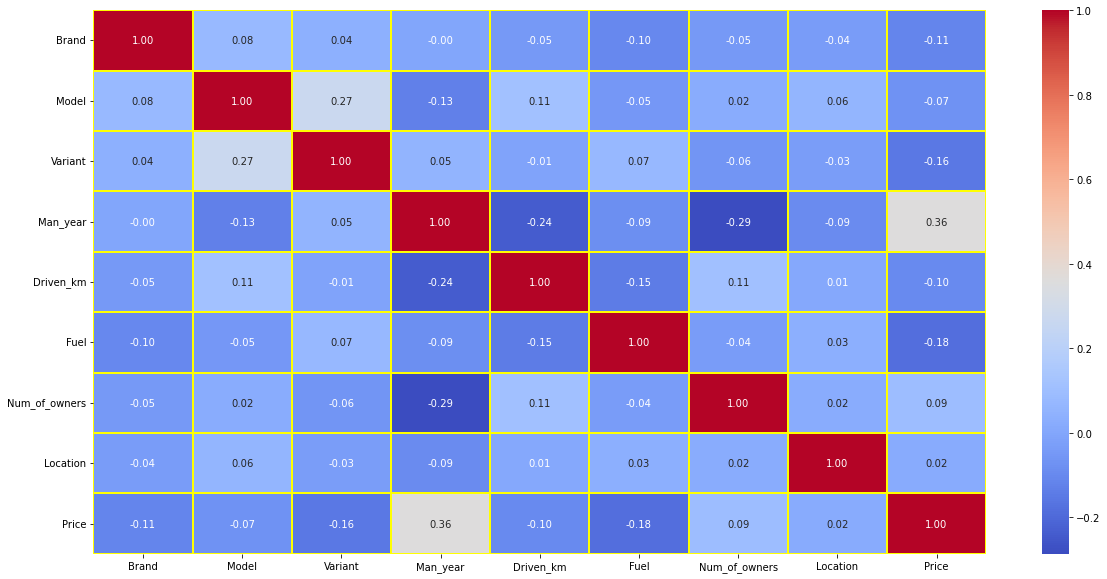

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="yellow",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

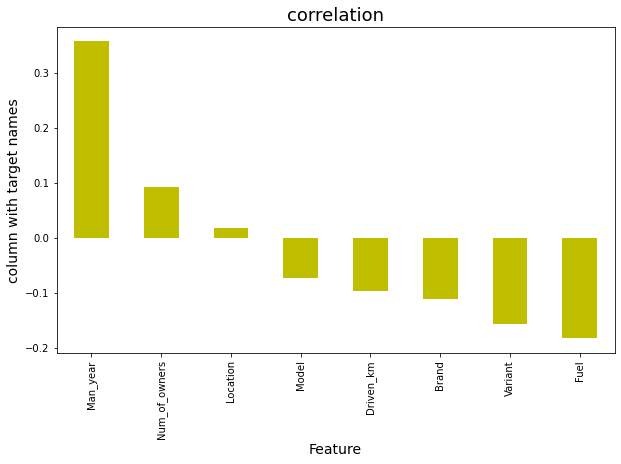

In [34]:
plt.figure(figsize=(10,6))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Our target column Price is positively correlated with Man_year and has negative correlation with Fuel column.

In [35]:
x=data.drop('Price', axis=1)
y=data['Price']
print(x.shape)
print(y.shape)

(2153, 8)
(2153,)


Other than price all other columns object type hence Skewness and outliers removal is not required.

# Finding best random state:

In [36]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.368804915153224  at Random State  128


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [38]:
model=[LinearRegression(),AdaBoostRegressor(),ElasticNet(alpha=0.0001),
       KNeighborsRegressor(),DecisionTreeRegressor(), BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc * 100,"%")
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 36.8804915153224 %
mean_absolute_error: 696599.851574225
mean_squared_error: 1180949777699.0833
Root mean_squared_error: 1086715.131807358


Accuracy Score of AdaBoostRegressor() is: -71.56118347267582 %
mean_absolute_error: 1645165.5358417693
mean_squared_error: 3209865639765.4136
Root mean_squared_error: 1791609.790039509


Accuracy Score of ElasticNet(alpha=0.0001) is: 36.88020313586322 %
mean_absolute_error: 696595.5021424221
mean_squared_error: 1180955173204.631
Root mean_squared_error: 1086717.6142883813


Accuracy Score of KNeighborsRegressor() is: 36.69545108670842 %
mean_absolute_error: 617508.1234338747
mean_squared_error: 1184411836550.3506
Root mean_squared_error: 1088306.866903977


Accuracy Score of DecisionTreeRegressor() is: 79.48887419620074 %
mean_absolute_error: 204354.99071925753
mean_squared_error: 383757891020.884
Root mean_squared_error: 619481.9537491661


Accuracy Score of BaggingRegressor() is: 88.10017024796198 %
mean_

Heighest Accurecy is BaggingRegressor which is 88.10%

# Hyper parameter tunning:

In [39]:
from sklearn.model_selection import RandomizedSearchCV

LinearRegression

In [40]:
parameters1={'fit_intercept':[True, False],'normalize':[True, False],
            'copy_X':[True, False],'positive':[True, False],
            'n_jobs':range(0,20)}

In [41]:
RSV1=RandomizedSearchCV(LinearRegression(),parameters1,cv=5)

In [42]:
RSV1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': range(0, 20),
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [43]:
RSV1.best_params_

{'positive': False,
 'normalize': False,
 'n_jobs': 8,
 'fit_intercept': False,
 'copy_X': False}

In [44]:
RSV1_pred=RSV1.best_estimator_.predict(x_test) 

In [45]:
RSV1_pred

array([ 1418671.71125749,   954541.34794022,   784424.05548174,
        1181594.25943072,  1590473.88122576,  1358540.96930077,
        1360991.09704547,   104488.13189734,  1564631.45702457,
        1333636.3712676 ,   340539.44438589,  1300745.84347838,
         754754.74123859,   774704.92449167,   460183.11696796,
          69146.657204  ,  1544821.43075511,  1767513.85435983,
        1832195.31410202,  2016991.04041457,   610195.283242  ,
        1231079.96684274,  2744604.08101183,   966066.10242153,
         532560.32414682,  2268304.16769996,  1657873.35370536,
        1235461.16938424,   521604.67990413,  1638790.21652725,
        2455051.88554809,  1061911.29531507,  1308832.23757896,
         995076.28298662,  1363333.82840318,  1729035.39770281,
        2462595.64038655,   884385.25724736,  1562775.92612962,
        4795412.09238469,   451455.04844464,   477864.23211565,
         222900.11360956,  1133770.14573419,   445703.34347981,
        1729035.39770281,  1094619.84944

In [46]:
score1 = RSV1.score(x_train,y_train)

AdaBoostRegressor

In [47]:
param2={'n_estimators': [20, 50, 70, 100], 'learning_rate' : [0.01,0.05,0.1,0.3,1],
       'loss' : ['linear', 'square', 'exponential'],'random_state':range(0,20)}

In [48]:
RSV2=RandomizedSearchCV(AdaBoostRegressor(),param2,cv=5)

In [49]:
RSV2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [20, 50, 70, 100],
                                        'random_state': range(0, 20)})

In [50]:
RSV2_pred=RSV2.best_estimator_.predict(x_test)

In [51]:
RSV2.best_params_

{'random_state': 11,
 'n_estimators': 20,
 'loss': 'linear',
 'learning_rate': 0.1}

In [52]:
RSV2_pred

array([1286273.74301676, 1286273.74301676,  584814.85870889,
       1286273.74301676, 1286273.74301676, 1523386.66666667,
       1286273.74301676,  584814.85870889,  608143.71859903,
        608143.71859903,  608143.71859903, 4017096.77419355,
        584814.85870889,  608143.71859903, 4042236.84210526,
        584814.85870889, 1785048.54368932, 1986458.33333333,
       1934386.55462185, 1483556.12244898,  584814.85870889,
        608143.71859903, 2203058.82352941,  608143.71859903,
        608143.71859903, 1286273.74301676,  660428.9784792 ,
        608143.71859903,  608143.71859903, 1354225.6568779 ,
       2475666.66666667,  584814.85870889, 1286273.74301676,
        584814.85870889, 1286273.74301676, 1934386.55462185,
       2933953.48837209,  608143.71859903, 1483556.12244898,
       4702733.33333333,  608143.71859903,  608143.71859903,
        627796.02516556, 1286273.74301676,  608143.71859903,
       1934386.55462185,  608143.71859903, 1286273.74301676,
       1286273.74301676,

In [53]:
score2 = RSV2.score(x_train,y_train)

ElasticNet

In [54]:
parameters3={'fit_intercept':[True, False],'normalize':[True, False],'precompute':[True, False],
            'copy_X':[True, False],'positive':[True, False],'warm_start':[True, False],
            'random_state':range(0,20),'l1_ratio':[0.5,1], 'selection':['cyclic','random']}

In [55]:
RSV3=RandomizedSearchCV(ElasticNet(alpha=0.0001),parameters3,cv=5)

In [56]:
RSV3.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(alpha=0.0001),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.5, 1],
                                        'normalize': [True, False],
                                        'positive': [True, False],
                                        'precompute': [True, False],
                                        'random_state': range(0, 20),
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]})

In [57]:
RSV3.best_params_

{'warm_start': True,
 'selection': 'random',
 'random_state': 11,
 'precompute': True,
 'positive': False,
 'normalize': True,
 'l1_ratio': 1,
 'fit_intercept': False,
 'copy_X': False}

In [58]:
RSV3_pred=RSV3.best_estimator_.predict(x_test) 

In [59]:
RSV3_pred

array([ 1418671.71123986,   954541.34808601,   784424.05540006,
        1181594.25951506,  1590473.88129425,  1358540.9693916 ,
        1360991.09688972,   104488.13207025,  1564631.45662565,
        1333636.3712907 ,   340539.44453516,  1300745.84348142,
         754754.74107422,   774704.92458465,   460183.11707638,
          69146.65742663,  1544821.43071869,  1767513.85432758,
        1832195.3140736 ,  2016991.04037812,   610195.28319443,
        1231079.96668329,  2744604.08090626,   966066.10253327,
         532560.32430385,  2268304.1673717 ,  1657873.3534677 ,
        1235461.16948102,   521604.68002244,  1638790.21659837,
        2455051.88543872,  1061911.29538165,  1308832.23765621,
         995076.28294389,  1363333.82848011,  1729035.3976636 ,
        2462595.64031516,   884385.25734703,  1562775.92617332,
        4795412.09095165,   451455.04865224,   477864.23225304,
         222900.11371169,  1133770.14586215,   445703.3436042 ,
        1729035.3976636 ,  1094619.84952

In [60]:
score3 = RSV3.score(x_train,y_train)

KNeighborsRegressor

In [61]:
parameters4={'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':range(0,20)}

In [62]:
RSV4=RandomizedSearchCV(KNeighborsRegressor(),parameters4,cv=5)

In [63]:
RSV4.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_jobs': range(0, 20),
                                        'weights': ['uniform', 'distance']})

In [64]:
RSV4.best_params_

{'weights': 'distance', 'n_jobs': 17, 'algorithm': 'ball_tree'}

In [65]:
RSV4_pred=RSV4.best_estimator_.predict(x_test) 

In [66]:
RSV4_pred

array([ 799000.        ,  412033.80550763,  220000.        ,
       1025000.        ,  614849.5762396 , 1575000.        ,
        459280.52501306,  305105.64241383,  295000.        ,
        631936.72566773,  499000.        , 3366016.78604927,
        579362.46477122,  525051.52334772, 1930000.        ,
        310000.        , 1311625.1036861 , 3579952.15352909,
        870184.81621176, 2786455.24974295,  512805.91245694,
        599322.1032439 ,  752679.60282772, 1687456.51331861,
        343934.3018641 , 1767463.90779472, 1027286.68313695,
        666321.94216247,  260000.        ,  875000.        ,
       1951000.        ,  483295.25768397,  835000.        ,
        250715.79064489,  731119.7154237 ,  482561.60352938,
       4395000.        ,  440000.        , 5500000.        ,
       7423000.        , 1743446.05402131,  410909.69630147,
        595000.        ,  405750.65256375,  155000.        ,
        482561.60352938,  425000.        , 1533925.9069104 ,
        840229.85582036,

In [67]:
score4 = RSV4.score(x_train,y_train)

DecisionTreeRegressor

In [68]:
parameters5={'criterion':['mse', "friedman_mse", "mae", 'poisson'],'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],'random_state':range(0,20)}

In [69]:
RSV5=RandomizedSearchCV(DecisionTreeRegressor(),parameters5,cv=5)

In [70]:
RSV5.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'random_state': range(0, 20),
                                        'splitter': ['best', 'random']})

In [71]:
RSV5.best_params_

{'splitter': 'best',
 'random_state': 4,
 'max_features': 'log2',
 'criterion': 'mae'}

In [72]:
RSV5_pred=RSV5.best_estimator_.predict(x_test)

In [73]:
RSV5_pred

array([ 799000.,  275000.,  220000., 1025000.,  575000., 1575000.,
        490000.,  235000.,  295000.,  595000.,  499000., 3500000.,
        570000.,  499000., 1930000.,  310000., 4850000., 4475000.,
       1150000., 2850000.,  225000.,  665000.,  990000.,  699000.,
        520000.,  520000., 1145000.,  265000.,  260000.,  875000.,
       1951000.,  465000.,  835000.,  465000.,  755000., 1895000.,
       4395000.,  440000., 3195000., 7423000., 1685000.,  390000.,
        595000.,  565000.,  155000., 1895000.,  425000.,  351000.,
        835000., 4150000.,  499000.,  520000.,  320000.,  190000.,
        390000.,  585000.,  500000.,  478000.,  480000.,  485000.,
        660000.,  395000.,  675000.,  998000.,  340000.,  168000.,
        655000., 4690000., 2390000.,  360000.,  370000., 7423000.,
        590000.,  259000.,  710000., 1175000.,  465000.,  600000.,
        421000.,  840000.,  670000.,  330000., 1051000.,  260000.,
        475000.,  575000.,  565000.,  751000., 1930000.,  3400

In [74]:
score5 = RSV5.score(x_train,y_train)

BaggingRegressor

In [75]:
#creating  parameter list to pass in RandomizedSearchCV
param6={'base_estimator':[None],'n_estimators':[0,2,5,10],
      'bootstrap':[True,False],'oob_score':[True,False],'warm_start':[True,False],
       'bootstrap_features':[True,False],'random_state':range(0,20)}

In [76]:
RSV6=RandomizedSearchCV(BaggingRegressor(),param6,cv=5)

In [77]:
RSV6.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingRegressor(),
                   param_distributions={'base_estimator': [None],
                                        'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'n_estimators': [0, 2, 5, 10],
                                        'oob_score': [True, False],
                                        'random_state': range(0, 20),
                                        'warm_start': [True, False]})

In [78]:
RSV6.best_params_

{'warm_start': True,
 'random_state': 12,
 'oob_score': False,
 'n_estimators': 10,
 'bootstrap_features': False,
 'bootstrap': True,
 'base_estimator': None}

In [79]:
RSV6_pred=RSV6.best_estimator_.predict(x_test) 

In [80]:
RSV6_pred

array([ 799000. ,  652600. ,  233600. ,  974400. ,  602300. , 1473500. ,
        595400. ,  223000. ,  282000. ,  605000. ,  499000. , 3295000. ,
        599500. ,  520400. , 1930000. ,  310000. , 6439800. , 2480000. ,
        906600. , 2995000. ,  233000. ,  637100. , 1881000. ,  416500. ,
        490900. , 2712600. , 1143000. ,  521500. ,  288000. ,  899000. ,
       1951000. ,  481000. ,  835000. ,  294700. ,  829300. , 1730100. ,
       4395000. ,  407500. , 3217000. , 7286100. , 1299500. ,  455800. ,
        578000. ,  639000. ,  253400. , 1730100. ,  425000. ,  887400. ,
        844000. , 6766300. ,  485700. , 4944500. ,  327000. ,  192200. ,
        397400. ,  458800. ,  658000. ,  475600. ,  737600. ,  505600. ,
        459700. ,  413000. ,  610000. , 1075600. ,  337100. ,  183500. ,
       1537500. , 1381000. , 2044500. ,  384000. , 2006900. , 7286100. ,
        645000. ,  304600. ,  856000. , 1022000. ,  614400. ,  567900. ,
        616500. ,  953000. ,  590400. ,  330000. , 

In [81]:
score6 = RSV6.score(x_train,y_train)

After performing RandomizedSearchCV method accuracy:

In [82]:
print("Accuracy for LinearRegression is ",score1*100,"%\n")
print("Accuracy for AdaBoostRegressor is ",score2*100,"%\n")
print("Accuracy for ElasticNet(alpha=0.0001) is ",score3*100,"%\n")
print("Accuracy for KNeighborsRegressor is ",score4*100,"%\n")
print("Accuracy for DecisionTreeRegressor is ",score5*100,"%\n")
print("Accuracy for BaggingRegressor is ",score6*100,"%")

Accuracy for LinearRegression is  19.920651849197935 %

Accuracy for AdaBoostRegressor is  46.30006178848507 %

Accuracy for ElasticNet(alpha=0.0001) is  19.920651849197935 %

Accuracy for KNeighborsRegressor is  100.0 %

Accuracy for DecisionTreeRegressor is  99.9997925488852 %

Accuracy for BaggingRegressor is  93.1382428208946 %


Selecting KNeighborsRegressor as final model for saving, as it was having good accuracy with model as well.

In [83]:
import joblib
joblib.dump(RSV4,"RSCPR.obj")

['RSCPR.obj']

In [84]:
RSVfile=joblib.load("RSCPR.obj")
RSVfile.predict(x_test)

array([ 799000.        ,  412033.80550763,  220000.        ,
       1025000.        ,  614849.5762396 , 1575000.        ,
        459280.52501306,  305105.64241383,  295000.        ,
        631936.72566773,  499000.        , 3366016.78604927,
        579362.46477122,  525051.52334772, 1930000.        ,
        310000.        , 1311625.1036861 , 3579952.15352909,
        870184.81621176, 2786455.24974295,  512805.91245694,
        599322.1032439 ,  752679.60282772, 1687456.51331861,
        343934.3018641 , 1767463.90779472, 1027286.68313695,
        666321.94216247,  260000.        ,  875000.        ,
       1951000.        ,  483295.25768397,  835000.        ,
        250715.79064489,  731119.7154237 ,  482561.60352938,
       4395000.        ,  440000.        , 5500000.        ,
       7423000.        , 1743446.05402131,  410909.69630147,
        595000.        ,  405750.65256375,  155000.        ,
        482561.60352938,  425000.        , 1533925.9069104 ,
        840229.85582036,

![](https://i.gifer.com/C8hy.gif)